# 1>The Sentiment Analysis for US news media gives you a picture of which are left wing, right wing ,neutral
2>if all the sentiments are negative then local and global news have some bad news in common, vice versa
3>Lot of the news in all the media have neutral sentiments

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import os
import json
style.use('ggplot')


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = os.getenv("DataAcct_consumer_key")
consumer_secret = os.getenv("DataAcct_consumer_secret")
access_token = os.getenv("DataAcct_access_token")
access_token_secret = os.getenv("DataAcct_access_token_secret")

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Account
target_users = ["@bbc","@CBS","@FOX","@CNN","@nytimes"]


In [3]:
# Variables for holding sentiments
sentiments = []

for target_user in target_users:
    # Counter
    counter = 100
  
    print(target_user)

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user,page=x)

        # Loop through all tweets 
        for tweet in public_tweets:

        
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
        
            # Add sentiments for each tweet into an array
            sentiments.append({"source" : tweet["user"]["screen_name"],
                                "DateHapp": datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y"), 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        
            # Add to counter 
            counter = counter -1

@bbc
@CBS
@FOX
@CNN
@nytimes


In [4]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd.sort_values(by=['Tweets Ago'],ascending=False)
sentiments_pd.to_csv('sent_anal.csv', encoding='utf-8', index=False)
sentiments_pd

,Compound,DateHapp,Negative,Neutral,Positive,Tweets Ago,source
0,0.3291,2017-12-02 21:59:04+00:00,0.895,0.000,0.105,100,BBC
200,0.0000,2017-12-03 00:21:41+00:00,1.000,0.000,0.000,100,fox
400,0.6369,2017-12-03 05:28:40+00:00,0.588,0.000,0.412,100,nytimes
300,0.2732,2017-12-03 05:30:06+00:00,0.896,0.000,0.104,100,CNN
100,0.6166,2017-12-02 15:55:39+00:00,0.825,0.000,0.175,100,CBS
401,0.2023,2017-12-03 05:11:53+00:00,0.663,0.148,0.189,99,nytimes
1,0.0000,2017-12-02 20:00:05+00:00,1.000,0.000,0.000,99,BBC
201,0.8904,2017-12-02 04:47:26+00:00,0.274,0.000,0.726,99,fox
101,0.1867,2017-12-02 14:30:03+00:00,0.902,0.000,0.098,99,CBS
301,0.4019,2017-12-03 05:15:08+00:00,0.847,0.000,0.153,99,CNN


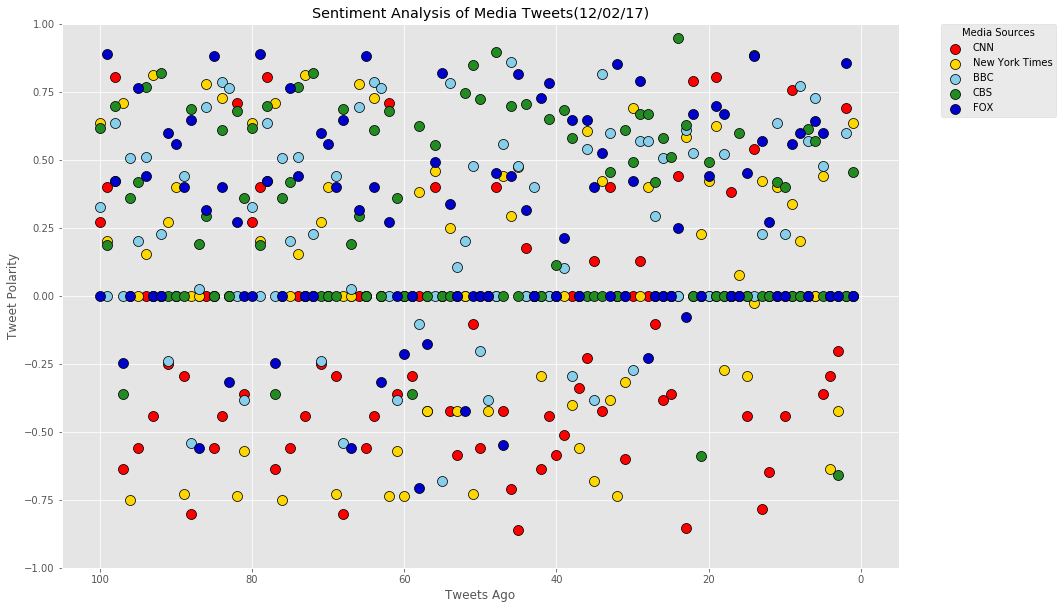

In [5]:
dt_display = datetime.today().strftime("%m/%d/%y")
fig, ax = plt.subplots()

sentiments_pd[sentiments_pd["source"] == 'CNN'].plot(kind="scatter",x='Tweets Ago',y="Compound", 
                                        ax=ax, label='CNN',c='red',s=100,edgecolor='black',linewidth=0.75)
sentiments_pd[sentiments_pd["source"] == 'nytimes'].plot(kind="scatter",x='Tweets Ago',y="Compound", 
                                        ax=ax, label='New York Times',c='Gold',s=100,edgecolor='black',linewidth=0.75)
sentiments_pd[sentiments_pd["source"] == 'BBC'].plot(kind="scatter",x='Tweets Ago',y="Compound", 
                                        ax=ax, label='BBC',c='SkyBlue',s=100,edgecolor='black',linewidth=0.75)
sentiments_pd[sentiments_pd["source"] == 'CBS'].plot(kind="scatter",x='Tweets Ago',y="Compound", 
                                        ax=ax, label='CBS',c='forestgreen',s=100,edgecolor='black',linewidth=0.75)
sentiments_pd[sentiments_pd["source"] == 'fox'].plot(kind="scatter",x='Tweets Ago',y="Compound", 
                                        ax=ax, label='FOX',c='mediumblue',s=100,edgecolor='black',linewidth=0.75)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title="Media Sources")
               
fig.set_size_inches(15, 10)
fig.set_alpha(1)

plt.xlim(105, -5)
plt.ylim(-1, 1)
plt.title("Sentiment Analysis of Media Tweets(" + dt_display + ")")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.show()
plt.savefig("sentiment_analysis.png")

In [6]:


mean_stats_df = pd.DataFrame({
    "Source":["BBC","CBS","FOX","CNN","NYT"],
    "Tweet Polarity":[np.mean(sentiments_pd[sentiments_pd["source"] == 'BBC']["Compound"]), 
                      np.mean(sentiments_pd[sentiments_pd["source"] == 'CBS']["Compound"]), 
                      np.mean(sentiments_pd[sentiments_pd["source"] == 'fox']["Compound"]), 
                      np.mean(sentiments_pd[sentiments_pd["source"] == 'CNN']["Compound"]),
                      np.mean(sentiments_pd[sentiments_pd["source"] == 'nytimes']["Compound"])]
})

mean_stats_df

,Source,Tweet Polarity
0,BBC,0.193783
1,CBS,0.293534
2,FOX,0.264443
3,CNN,-0.112579
4,NYT,0.057151


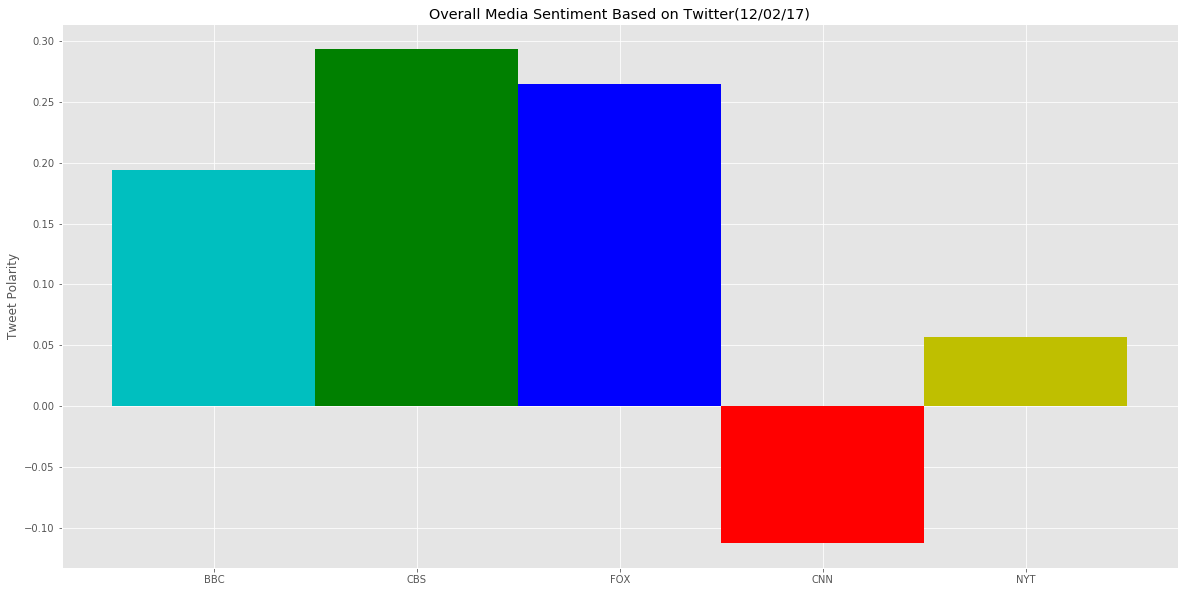

In [7]:
fig, ax = plt.subplots()


bar_plot = mean_stats_df["Tweet Polarity"]\
.plot(kind='bar',ax=ax,figsize=(20, 10),color='cgbry',width=1.0 )
ax.set_xticklabels(["BBC","CBS",'FOX','CNN','NYT'],rotation=360)

plt.title("Overall Media Sentiment Based on Twitter(" + dt_display + ")")
plt.ylabel("Tweet Polarity")
plt.savefig("overall_sentiment.png")
plt.show()